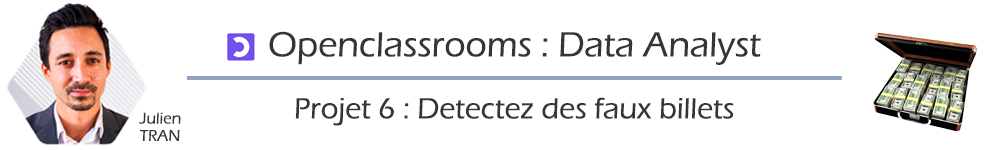

### Mission 1 :  

Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

- analyse de l'éboulis des valeurs propres ;
- représentation des variables par le cercle des corrélations ;
- représentation des individus par les plans factoriels ;
- analyser de la qualité de représentation et la contribution des individus.

Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

### Sommaire // Mission 1 💶

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Analyse en composantes principales (ACP)](#3)
    * [3.1.Centrage réduction](#3.1)
    * [3.2.Eboulis des valeurs propres](#3.2)
    * [3.3.Cercle des correlations](#3.3)
        * [3.3.1.Contribution des variables](#3.3.1)
        * [3.3.2.Cos2 des variables](#3.3.2)
    * [3.4.Projection des individus sur la plan factoriel](#3.4)
    * [3.5.Contribution et qualité de réprésentation](#3.5)
        * [3.5.1.Contribution des individus](#3.5.1)
        * [3.5.2.Cos2 des individus](#3.5.2)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#install.packages('summarytools')
#install.packages('ggfortify')
#install.packages('ggplot2')
#install.packages('ggcorrplot')
#install.packages('broom')
#install.packages('pander')
#install.packages('repr')
#install.packages('ggpubr')
#install.packages('cowplot')

In [2]:
#j'importe les librairies qui vont me servir plus tard

library(factoextra)
library(FactoMineR)
library(ggplot2)
library(ggfortify)
library(ggcorrplot)
library(summarytools)
library(broom)
library(pander)
library(repr)
library(ggpubr)
library(gridExtra)
library(cowplot)
library(repr)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')
Warning message:
"package 'pander' was built under R version 3.6.3"Warning message:
"package 'repr' was built under R version 3.6.3"Warning message:
"package 'ggpubr' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'cowplot' was built under R version 3.6.3"
Attaching package: 'cowplot'

The following object is masked from 'package:ggpubr':

    get_legend



## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [3]:
#notes2 <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', row.names=1, encoding="UTF-8")
notes <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', head = TRUE, encoding="UTF-8")

#j'ajoute une colonne num billet
notes["num_billet"] <- seq(1,170)

head(notes)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,num_billet
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,True,171.81,104.86,104.95,4.52,2.89,112.83,1
2,True,171.67,103.74,103.70,4.01,2.87,113.29,2
3,True,171.83,103.76,103.76,4.40,2.88,113.84,3
4,True,171.80,103.78,103.65,3.73,3.12,113.63,4
5,True,172.05,103.70,103.75,5.04,2.27,113.55,5
6,True,172.57,104.65,104.44,4.54,2.99,113.16,6


## 3.Analyse en composantes principales (ACP) <a class="anchor" id="3"></a>

## 3.1.Centrage réduction <a class="anchor" id="3.1"></a>

In [4]:
notes2 <- notes[,c(2,3,4,5,6,7)]
head(notes2)

,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,171.81,104.86,104.95,4.52,2.89,112.83
2,171.67,103.74,103.70,4.01,2.87,113.29
3,171.83,103.76,103.76,4.40,2.88,113.84
4,171.80,103.78,103.65,3.73,3.12,113.63
5,172.05,103.70,103.75,5.04,2.27,113.55
6,172.57,104.65,104.44,4.54,2.99,113.16


#### Une ACP ne peut se faire que si les données sont centrées et réduites (transformation pour que moyenne = 0 et écart type = 1)

In [5]:
acp <- PCA(notes2, scale.unit = T,ncp = 7)
head(acp)

$eig
       eigenvalue percentage of variance cumulative percentage of variance
comp 1  2.8468752              47.447921                          47.44792
comp 2  1.3174264              21.957106                          69.40503
comp 3  0.8540715              14.234524                          83.63955
comp 4  0.5115777               8.526295                          92.16585
comp 5  0.2767693               4.612822                          96.77867
comp 6  0.1932799               3.221331                         100.00000

$var
$var$coord
                  Dim.1      Dim.2       Dim.3       Dim.4      Dim.5
diagonal      0.1236346  0.8948635 -0.08215244 -0.40034612  0.1184196
height_left   0.8022997  0.3893886  0.11345001  0.19887167 -0.3766378
height_right  0.8298348  0.2703538  0.14216371  0.32825381  0.2562014
margin_low    0.7272578 -0.3679098  0.47391620 -0.16202319  0.1640912
margin_up     0.5948294 -0.1619761 -0.75887278  0.09680115  0.1020310
length       -0.7852090  0.361022

In [6]:
summary(acp, ncp = 2)


Call:
PCA(X = notes2, scale.unit = T, ncp = 7) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6
Variance               2.847   1.317   0.854   0.512   0.277   0.193
% of var.             47.448  21.957  14.235   8.526   4.613   3.221
Cumulative % of var.  47.448  69.405  83.640  92.166  96.779 100.000

Individuals (the 10 first)
                 Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
1            |  4.291 |  2.154  0.958  0.252 |  1.600  1.143  0.139 |
2            |  2.333 | -2.110  0.920  0.818 | -0.526  0.124  0.051 |
3            |  2.227 | -1.973  0.804  0.785 | -0.048  0.001  0.000 |
4            |  2.192 | -2.060  0.877  0.883 | -0.089  0.004  0.002 |
5            |  4.247 | -2.403  1.193  0.320 |  0.412  0.076  0.009 |
6            |  3.395 |  1.236  0.315  0.132 |  2.983  3.974  0.772 |
7            |  2.834 | -2.079  0.893  0.539 |  1.148  0.588  0.164 |
8            |  3.057 | -2.624  1.423  0.737 | -1.040  0.483  0.116 |
9  

Ici j'ai choisi de n'afficher que les détails des deux premières composantes principales (ncp =2).
Les eignevalues représentent les valeurs propres. La première composante résume à elle seule 47,45% de la variance des individus, ce qui fait si on ajoute à ce pourcentage de variance, le pourcentage de variance de la deuxième composante nous résumons 69,41% de l'information. C'est un excellent score. Donc au lieu de 6 variables explicatives, seules 2 variables synthétiques suffisent pour comprendre la variabilité des individus. Nous verrons comment commenter ces variables.

## 3.2.Eboulis des valeurs propres <a class="anchor" id="3.2"></a>

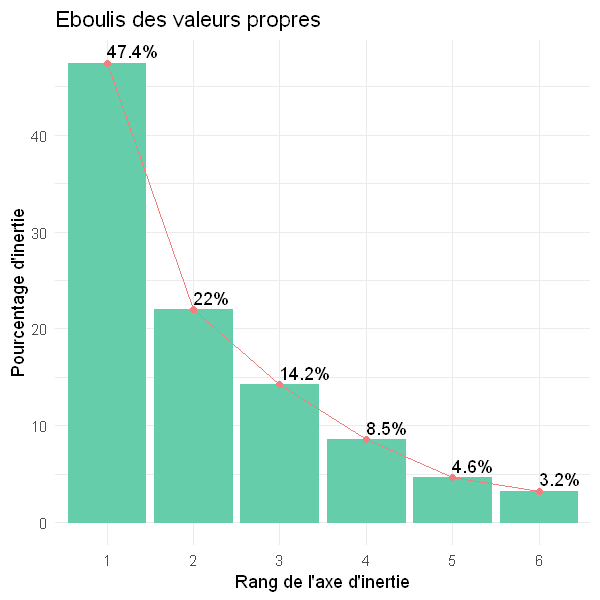

In [7]:
options(repr.plot.width=5, repr.plot.height=5)

p <- fviz_eig(acp, addlabels = TRUE,barfill = "medium aqua marine",barcolor = "medium aqua marine", linecolor ="light coral") + theme_minimal()

p + labs(title = "Eboulis des valeurs propres",
         x = "Rang de l'axe d'inertie", y = "Pourcentage d'inertie")

Le premier plan (PC1 + PC2) factoriel de l’ACP a permis de conserver 70 % de l’information totale. Nous ne regarderons pas les autres composantes qui, selon le critère de Kaiser, représentent moins de variabilité qu’une variable initiale

Critère de Kaiser: on ne retient que les axes dont l’inertie est supérieure à l’inertie moyenne 100/p (ici 100/6 = 16,7%, seul les trois premiers rangs possèdent un pourcentage supérieur à 16,7% et seuls les deux premiers permettent de former un plan factoriel.

## 3.3.Cercle des correlations <a class="anchor" id="3.3"></a>

Représentons maintenant le graphique des variables sur les deux prémières composantes

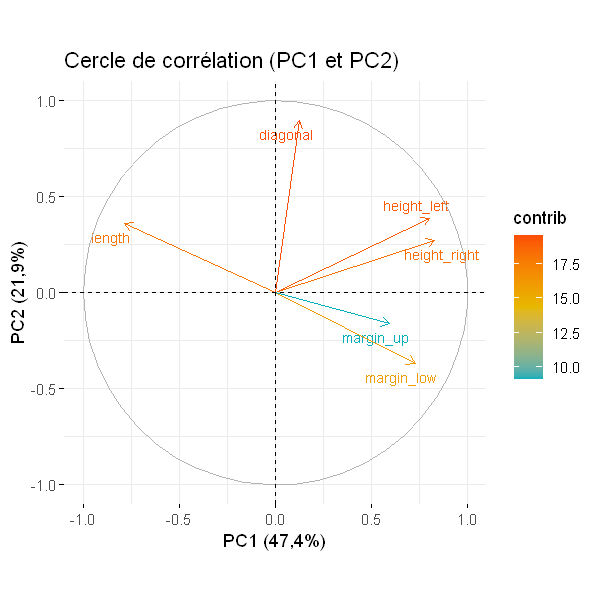

In [8]:
options(repr.plot.width=5, repr.plot.height=5)

fviz_pca_var(acp,
             title='Cercle de corrélation (PC1 et PC2)',
             col.var = "contrib",
             gradient.cols =  c("#00AFBB", "#E7B800", "#FC4E07"),
             geom=c('arrow', 'text'), # point
             labelsize = 3,
             repel = TRUE) +
             labs(x = "PC1 (47,4%)", y = "PC2 (21,9%)")

La variable diagonal contribue fortement (et positivement) à PC2. 

Les variables height_left et height_right contribuent le plus et positivement à PC1.

Les variables margin_up et margin_low contribuent positivement à PC1.

La variable lenght contribue négativement à PC1.

In [9]:
acp$var$cor

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
diagonal,0.1236346,0.8948635,-0.08215244,-0.40034612,0.1184196,0.05370861
height_left,0.8022997,0.3893886,0.11345001,0.19887167,-0.3766378,0.10205336
height_right,0.8298348,0.2703538,0.14216371,0.32825381,0.2562014,-0.21138296
margin_low,0.7272578,-0.3679098,0.47391620,-0.16202319,0.1640912,0.24075808
margin_up,0.5948294,-0.1619761,-0.75887278,0.09680115,0.1020310,0.15579811
length,-0.7852090,0.3610224,0.11728832,0.41033916,0.1338458,0.23034781


Comme constaté graphiquement ci-dessus cette table des correlations nous indique bien une forte correlation entre la diagonale et PC2 (coeff de variation de 0,89), une forte correlation entre la hauteur à droite et à gauche avec PC1 (0,80 et 0,82), une correlation moyen des marges avec PC1 (0,72 et 0,59), et enfin une correlation forte negative entre la longueur et PC1 (-0,78)

## 3.3.1.Contribution des variables <a class="anchor" id="3.3.1"></a>

In [10]:
var_contrib <- acp$var$contrib
var_contrib <- var_contrib[,c(1,2)]
var_contrib[order(var_contrib[,1],decreasing=T), ]

,Dim.1,Dim.2
height_right,24.1888293,5.548028
height_left,22.6102201,11.509069
length,21.6571915,9.893318
margin_low,18.5784026,10.274396
margin_up,12.4284339,1.991478
diagonal,0.5369225,60.783710


## 3.3.1.Cos2 des variables <a class="anchor" id="3.3.2"></a>

In [11]:
var_cos2 <- acp$var$cos2
var_cos2 <- var_cos2[,c(1,2)]
var_cos2[order(var_cos2[,1],decreasing=T), ]

,Dim.1,Dim.2
height_right,0.68862579,0.07309119
height_left,0.64368476,0.15162351
length,0.61655322,0.13033718
margin_low,0.52890394,0.13535760
margin_up,0.35382201,0.02623626
diagonal,0.01528551,0.80078062


## 3.4.Projection des individus sur le premier plan factoriel <a class="anchor" id="3.4"></a>

In [12]:
notes3 <- notes[,c(1,2,3,4,5,6,7)]
head(notes3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,True,171.81,104.86,104.95,4.52,2.89,112.83
2,True,171.67,103.74,103.70,4.01,2.87,113.29
3,True,171.83,103.76,103.76,4.40,2.88,113.84
4,True,171.80,103.78,103.65,3.73,3.12,113.63
5,True,172.05,103.70,103.75,5.04,2.27,113.55
6,True,172.57,104.65,104.44,4.54,2.99,113.16


In [13]:
groupe <- as.factor(notes3$is_genuine)

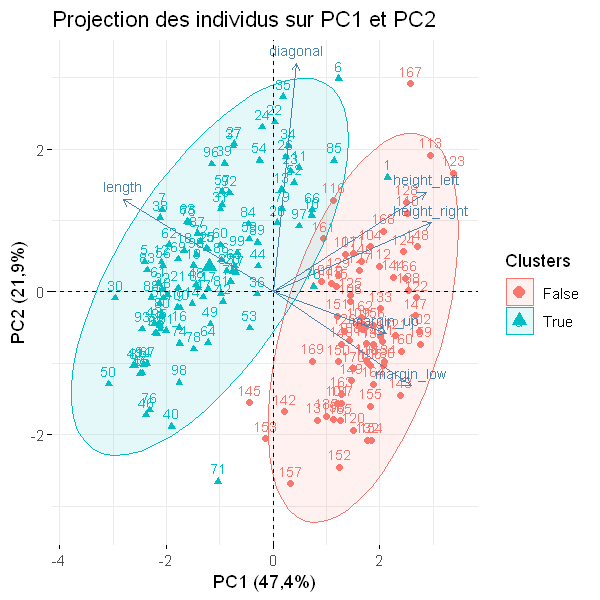

In [14]:
options(repr.plot.width=5, repr.plot.height=5)

fviz_pca_biplot(acp, axes = c(1,2), col.ind = groupe,
             addEllipses = TRUE, labelsize = 3,title = "Projection des individus sur PC1 et PC2",legend.title = "Clusters") +
             labs(x = "PC1 (47,4%)", y = "PC2 (21,9%)")

L'ACP discrimine bien les billets en 2 groupes (les authentiques et les falsifiés). Seuls quelques points sont à l'interface des 2 groupes (par exemple : billets n°1, 70 , 116, 161).

## 3.5.Contribution et Cos2 des individus <a class="anchor" id="3.5"></a>

## 3.5.1.Contribution des individus <a class="anchor" id="3.5.1"></a>

In [15]:
ind_contrib <- acp$ind$contrib
ind_contrib <- ind_contrib[,c(1,2)]

head(ind_contrib[order(ind_contrib[,1],decreasing=T), ])
head(ind_contrib[order(ind_contrib[,2],decreasing=T), ])

,Dim.1,Dim.2
123,2.375821,1.237230426
50,1.962027,0.748728505
30,1.808879,0.003763207
113,1.795012,1.625930532
159,1.583607,0.242330730
102,1.548261,0.138522104


,Dim.1,Dim.2
6,0.315484399,3.973625
167,1.381067591,3.792665
35,0.007310925,3.330188
157,0.021141794,3.226385
71,0.219686858,3.151608
152,0.325078107,2.692218


- Les billets qui contribuent le plus sur PC1 sont 123, 50, 30, 113 et 159
- Les billets qui contribuent le plus sur PC2 sont 6, 167, 35, 157 et 71

In [16]:
head(ind_contrib[order(ind_contrib[,1],decreasing=F), ])
head(ind_contrib[order(ind_contrib[,2],decreasing=F), ])

,Dim.1,Dim.2
22,0.0002043233,2.5151169
28,0.0013635333,0.4179027
153,0.0038358803,1.8909795
13,0.0053045949,0.9139810
79,0.0059372775,0.6046598
35,0.0073109247,3.3301879


,Dim.1,Dim.2
138,1.32766896,0.0001580411
81,0.19557108,0.0002816873
32,0.89290137,0.0003081682
36,0.01801939,0.0005434927
17,0.30414588,0.0005679993
3,0.80445900,0.0010331112


- Les billets qui contribuent le moins sur PC1 sont 22, 28, 153, 13 et 79
- Les billets qui contribuent le moins sur PC2 sont 138, 81, 32, 36 et 17

## 3.5.2.Cos2 des individus <a class="anchor" id="3.5.2"></a>

In [17]:
ind_cos2 <- acp$ind$cos2
Dim.1_2 <- ind_cos2[,c(1)] + ind_cos2[,c(2)]

#ind_cos2$Dim.1_2 <- Dim.1_2
ind_cos2 <- cbind(ind_cos2, Dim.1_2)
ind_cos2 <- ind_cos2[,c(1:7)]
head(ind_cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.1_2
1,0.2519288,0.1389998493,0.17354028,0.32164914,0.0265915011,8.729042e-02,0.3909287
2,0.8180018,0.0508222504,0.05406524,0.02180326,0.0008353306,5.447217e-02,0.8688240
3,0.7848622,0.0004664386,0.14865204,0.02832043,0.0363929451,1.305931e-03,0.7853287
4,0.8828556,0.0016521437,0.05878888,0.05616852,0.0002302870,3.046142e-04,0.8845077
5,0.3201449,0.0094172952,0.61083108,0.03883908,0.0097855571,1.098213e-02,0.3295622
6,0.1324469,0.7719848386,0.07879189,0.01311454,0.0035813865,8.042803e-05,0.9044318


In [18]:
head(ind_cos2[order(ind_cos2[,7],decreasing=T), ])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.1_2
149,0.5781934,0.410807108,1.050945e-02,0.0001433305,9.153564e-06,3.375149e-04,0.9890006
144,0.9734563,0.007583532,6.511247e-06,0.0099965100,1.774429e-03,7.182694e-03,0.9810399
47,0.9622963,0.003342898,1.607792e-03,0.0243907911,3.725589e-03,4.636625e-03,0.9656392
46,0.6313079,0.331304983,1.786474e-02,0.0136381668,4.807612e-03,1.076563e-03,0.9626129
155,0.5427325,0.417831051,1.566044e-02,0.0009743044,6.671358e-03,1.613037e-02,0.9605635
91,0.8981219,0.061453598,2.553242e-02,0.0090443102,5.823712e-03,2.405957e-05,0.9595755


In [19]:
head(ind_cos2[order(ind_cos2[,7],decreasing=F),])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.1_2
36,0.02478622,0.0003459568,0.45647037,0.516969439,0.0001065602,0.0013214593,0.02513217
44,0.03875466,0.0632887484,0.24883039,0.002692077,0.6461391808,0.0002949482,0.10204340
161,0.06874204,0.0429005943,0.56686964,0.295141552,0.0123190391,0.0140271349,0.11164264
89,0.02327268,0.1357669823,0.41135718,0.302620489,0.1268629954,0.0001196670,0.15903967
53,0.07667286,0.1061339665,0.13791953,0.517350313,0.0458216320,0.1161017001,0.18280682
73,0.21659086,0.0066550104,0.04512055,0.002327299,0.4020816327,0.3272246436,0.22324587


In [20]:
notes_faux_billets <- notes[notes$is_genuine == "False",c(2:7)]
notes_vrais_billets <- notes[notes$is_genuine == "True",c(2:7)]

In [21]:
res.pca0 <- prcomp(notes2,  scale = TRUE)
res.pca <- prcomp(notes_faux_billets,  scale = TRUE)
res.pca2 <- prcomp(notes_vrais_billets,  scale = TRUE)

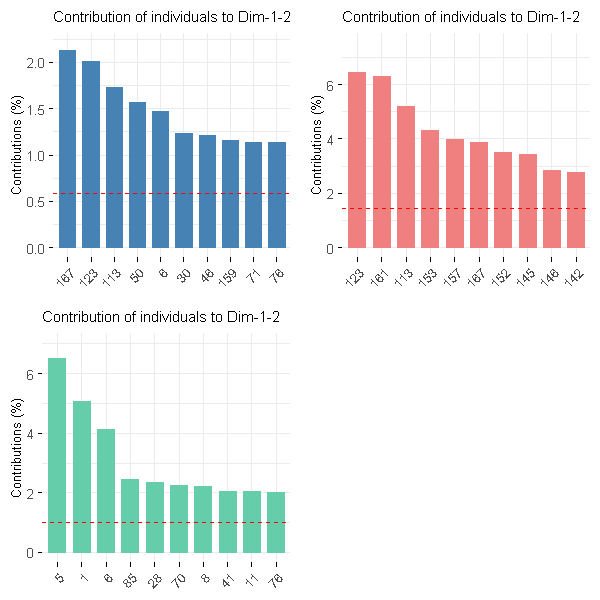

In [22]:
P1 <- fviz_contrib(res.pca0, choice="ind", axes = 1:2,fill = "steel blue",color ='steel blue',top = 10,sort.val = c("desc")) + ylim (0, 2.2) + theme(text = element_text(size = 7.5),axis.title = element_text(size = 7.5),axis.text = element_text(size = 7.5))
P2 <- fviz_contrib(res.pca, choice="ind", axes = 1:2,fill = "light coral",color ='light coral',top = 10,sort.val = c("desc")) + ylim (0, 7.5) + theme(text = element_text(size = 7.5),axis.title = element_text(size = 7.5),axis.text = element_text(size = 7.5))
P3 <- fviz_contrib(res.pca2, choice="ind", axes = 1:2,fill = "medium aqua marine",color ='medium aqua marine', top = 10,sort.val = c("desc")) + ylim (0, 7) + theme(text = element_text(size = 7.5),axis.title = element_text(size = 7.5),axis.text = element_text(size = 7.5))

ggpubr::ggarrange(P1,P2,P3)

On remarque que certains individus (167, 1, 5 ...) contribuent fortement à l'inertie totale. Sur la projection graphique, on les retrouve bien aux extrémités du plan factoriel pour leur catégorie.

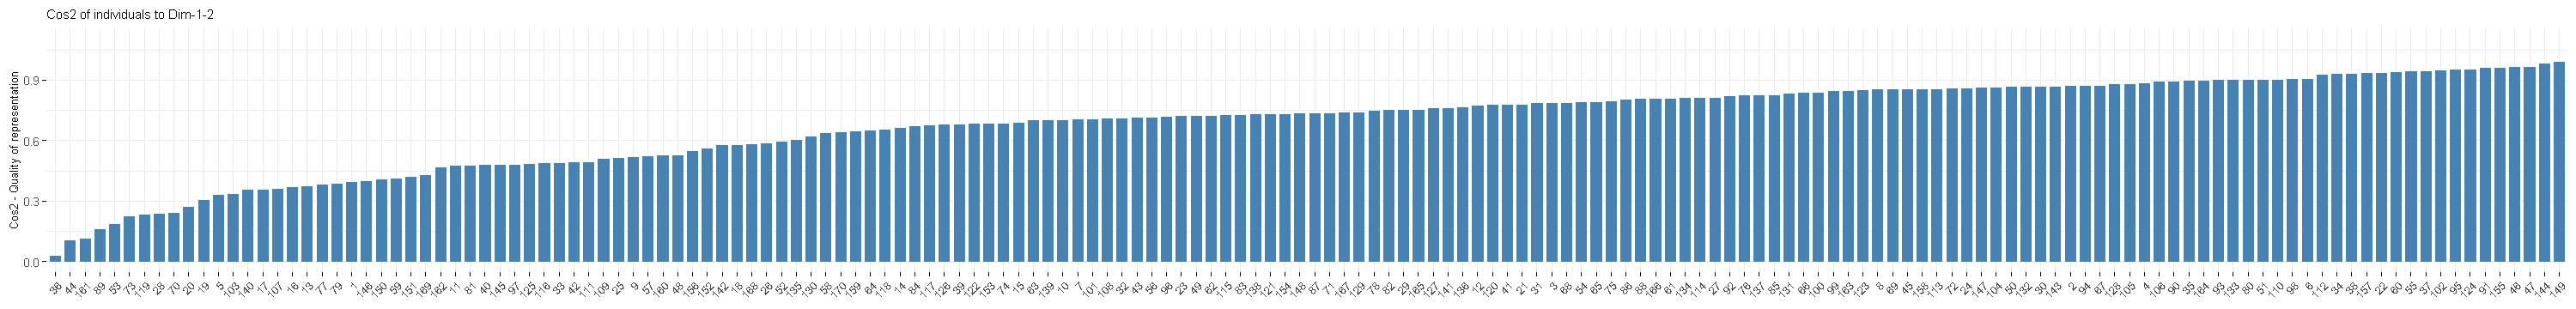

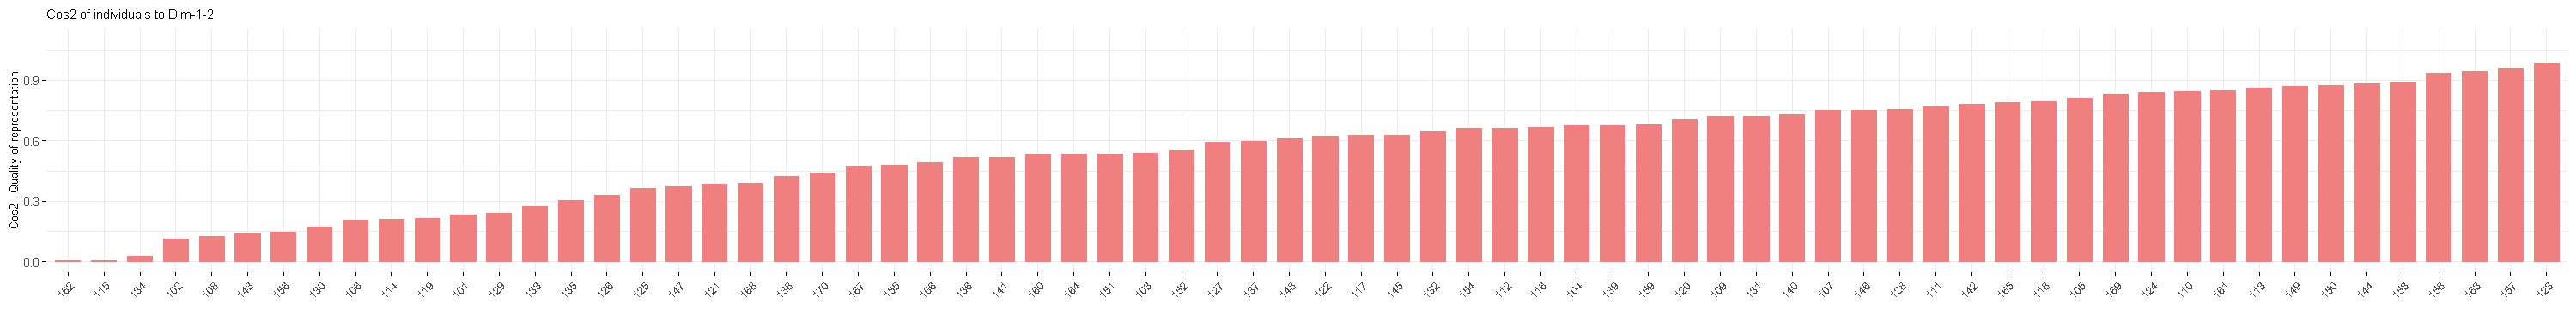

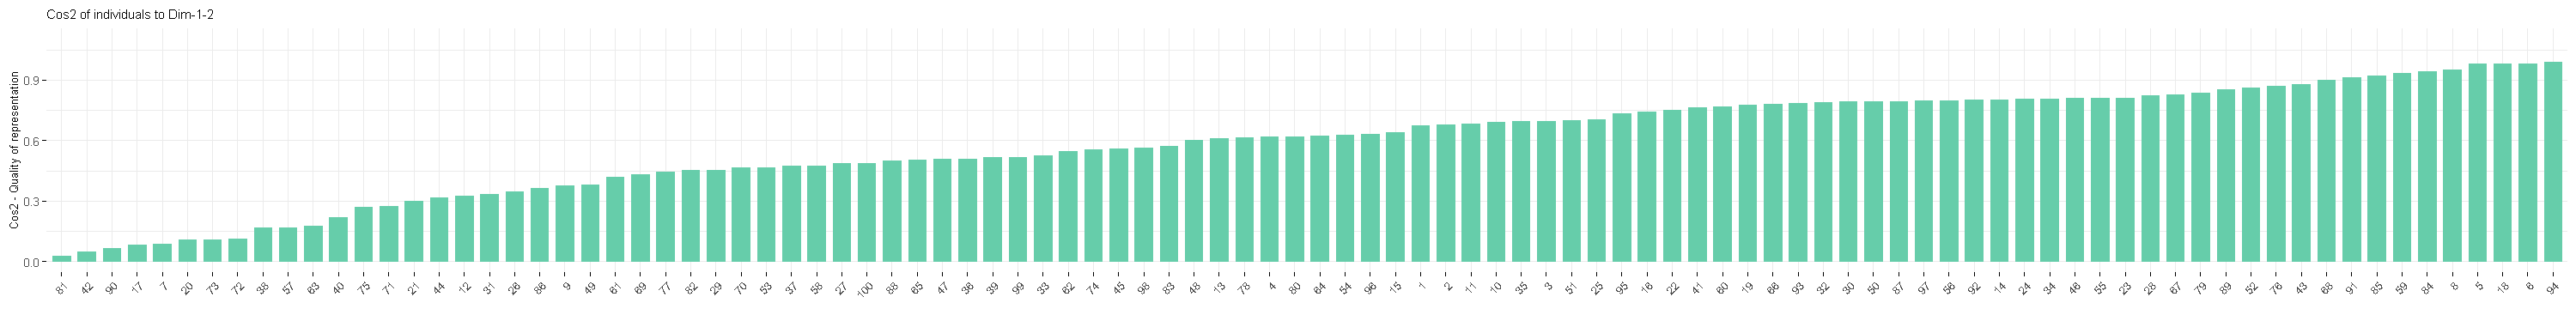

In [33]:
options(repr.plot.width=25, repr.plot.height=3)

P4 <- fviz_cos2(res.pca0, choice="ind", axes = 1:2,fill = "steel blue",color ='steel blue',sort.val = c("asc")) + ylim (0, 1.1)+ theme(text = element_text(size = 7.5),axis.title = element_text(size = 7.5),axis.text = element_text(size = 7.5))
P5 <- fviz_cos2(res.pca, choice="ind", axes = 1:2,fill = "light coral",color ='light coral',sort.val = c("asc")) + ylim (0, 1.1) + theme(text = element_text(size = 7.5),axis.title = element_text(size = 7.5),axis.text = element_text(size = 7.5))
P6 <- fviz_cos2(res.pca2, choice="ind", axes = 1:2,fill = "medium aqua marine",color ='medium aqua marine',sort.val = c("asc")) + ylim (0, 1.1) + theme(text = element_text(size = 7.5),axis.title = element_text(size = 7.5),axis.text = element_text(size = 7.5))

#plot_grid(P4, P5, P6, ncol = 3, rel_heights = c(2, 2, 2))
#grid.arrange(P4,P5,P6, ncol = 3,heights=c(3,3,3),widths=c(5,5,5), top = 'title')

#ggpubr::ggarrange(P4,P5,P6)

P4
P5
P6

#### Localiser les individus qui ont une qualité de représentation faible me permet de d'identifier les billets qui ont des données moins fiables à exploiter, et de considérer un traitement comme la suppression.